# Objetivos:
- Mostrar como o aprendizado do perceptron realmente acontence
- Implementaçao do perceptron e seu modelo de aprendizado
- Utilizar o perceptron para regressão e classificação

# Pseudo código do Perceptron

1. Inicialize os pesos $w$ e o bias $b$
2. Para cada amostra $(x_n, y_n)$ do nosso banco:
    1. Calcule $\widehat{y} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_n - \widehat{y}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Importes e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets._samples_generator import make_blobs

%matplotlib inline

# Classificação

(100, 2) (100,)


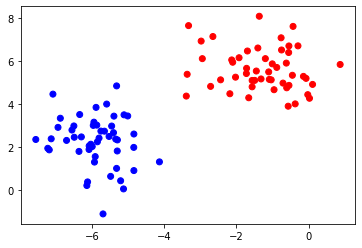

In [2]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [3]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

## Resolvendo o problema 

### Python

In [6]:
D = x.shape[1]
w = [2*random()-1 for i in range(D)]
b = 2*random()-1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum(x_i*w_i for x_i, w_i in zip(x_n, w)) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w  = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step % 10 == 0:
        print("step {0}: {1}".format(step, cost))
       
print("w:", w)
print("b:", b)

step 0: 37
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.23547137222846692, 0.0021994240927684927]
b: 0.8606212282563499


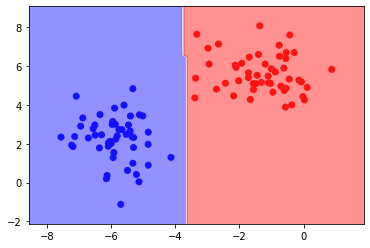

In [7]:
plot_linear_classifier(x, y, w, b)

### Numpy

In [11]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    for  x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + learning_rate*np.dot(x_n, error)
        b = b + learning_rate*error
        cost += error**2
        
    if step % 10 == 0:
        print("step {0}: {1}".format(step, cost))
       
print("w:", w)
print("b:", b)

step 0: 9
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.20959748 0.26330473]
b: -0.2459582211776703


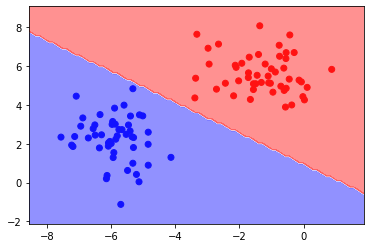

In [12]:
plot_linear_classifier(x, y, w, b)

### Observação:
- Se perceber direitinho esse modelo de perceptron é bem genérico e, por isso, ele vai funcionar para praticamente qualquer caso de classificação, em que que dê para usar o perceptron, é claro.

# Regressão